# Introducrtion to Machine Learning: Assignment #1
## Submission date: 27\04\2025, 23:59.
### Topics:
- Bayesian Risk
- Parametric Density Estimation
- Naïve Bayes
- Bayesian Decision Rule

Submitted by:

 **Omar Ryyan - 322283755

 **Mahmoud Abadi - 206773756

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.

## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Risk

**Make sure to provide full solutions in a single PDF file.**

### Section A

You need to make a decision on which TV set to choose, based on the quality of the picture it shows.

All TVs in the market are classified with the priors: bad=0.2, fair=0.5, and good 0.3.

The pictures in different TV sets are distributed as follows:
<div align="center">

|  $p(x|c)$  | Good | Fair | Bad  |
| -------------------- | ---- | ---- | ---- |
| Sharp picture        | 0.9  | 0.6  | 0.3  |
| Diminished picture   | 0.1  | 0.4  | 0.7  |

</div>

The loss function is defined as follows:

<div align="center">

|  $\lambda(\alpha_i|c_i)$  | Good | Fair | Bad  |
| ------------ | ---- | -- | -- |
| Buy TV       | 0    | 4  | 20 |
| Don't buy TV | 10   | 6  | 0  |

</div>

Your task: Make the optimal decision and provide the conditional risk associated with your decision.

### Section B

We use Bayesian decision rule to classify samples and take a decision, such that minimizes the risk.

To minimize the risk, we use some loss function $λ(a_i│c_j)$ and take the decision $α_i$ that minimizes $R(α_i│x)$.

We now define the 0-1 loss function, $λ(a_i│c_j )=\mathbb{I}_{i\ne j}$ (the indicator function over the event $i\ne j$).

Prove that under this loss function, the Bayesian decision rule is equivalent to the MAP classification.


## Question 2 - Parametric density estimation

**Make sure to provide full solutions in a single PDF file.**

We aim to learn a classification task for C classes.

For each class, the data ($x\in\mathbb{R}$) is circular distributed:
$$
p(x|c) = \frac{2x}{r_c^2}\cdot\mathbb{I}_{x \in [0, r_c]}
$$

Given dataset $D=\{x_1,...,x_n\}$

1. Find the parameter $r_c$ using Maximum Likelihood Estimation and draw the density $p(x)$.
2. Assume $r_c\sim \mathcal{U}(c,5)$, find $p(x)$ (full solution) and draw in the same graph as before.

Compare the results and try to justify which method is "better" here.

Recommendations: use <a href='https://www.desmos.com/calculator'>desmos</a> with some fixed samples to demonstrate your graphs


## Question 3 - Bayesian Decision Rule

You are given a dataset represents customer behavior data collected from a retail company. The three classes represent different types of customers: infrequent buyers, occasional buyers, and frequent buyers. The features include 10 various customer features. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

The dataset of customers is give by this url: https://sharon.srworkspace.com/ml/datasets/hw1/customers.csv

import libarires

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Use pandas module to load the dataset (directly from the url) into dataframe object.

Print the table size and print the first 5 rows.

In [9]:
# Implement here
df=pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/customers.csv')
#print(df)
print(df.shape)
print(df[:5])

(1000, 11)
   average_spending  frequency_of_visits  promotion_responsiveness  \
0         -0.221948            -1.120637                  2.196646   
1          1.858383            -3.680880                  0.227496   
2          0.558890            -1.725818                  0.585904   
3          0.428417            -1.801396                  2.015275   
4         -0.131161            -2.079008                  1.483744   

   customer_age  loyalty_score  preferred_category  last_purchase_interval  \
0      0.553293       0.767479           -1.226179                1.887976   
1     -3.818368       0.635968            1.609521               -0.153135   
2     -1.718041      -0.736770           -1.406815                0.768721   
3     -1.559837       1.290644           -1.889649                1.195451   
4      1.636858      -0.734811           -0.640154                2.666422   

   average_basket_size  store_affinity  online_vs_instore_ratio  label  
0             0.681743    

As learned in the first tutorial, you should theoretically have a separate test set and craft a validation set from the data. However, we do not have such test and do not have any need from validation in this question.

Convert the dataframe object to numpy matrix and split the data to 80% training and 20% test with random state of 42. <br/>Make sure to maintain the dataset priors, using stratify=y, in train_test_split method.
<br/>Note that the dataframe object contains the labels as well.

In [10]:
# Extract features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column contains labels

# Split data into train and test sets (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (800, 10)
Test set shape: (200, 10)


### Preprocessing

A fundamental step in learning is to check our assumptions and apply fixes if required. You will do so now.

If you want to assume gaussian distribution, you need to check if most (or all) features are gaussian distributed.<br/>
The code is attached below, but make sure it shows the features densities only.

Well, are the features gaussian?

<font color='red'>
not all features look Gaussian—some are skewed or have multiple peaks. also, the features are highly correlated, which makes the covariance matrix nearly singular. this can cause issues for Gaussian Bayes, which relies on inverting that matrix.
</font>

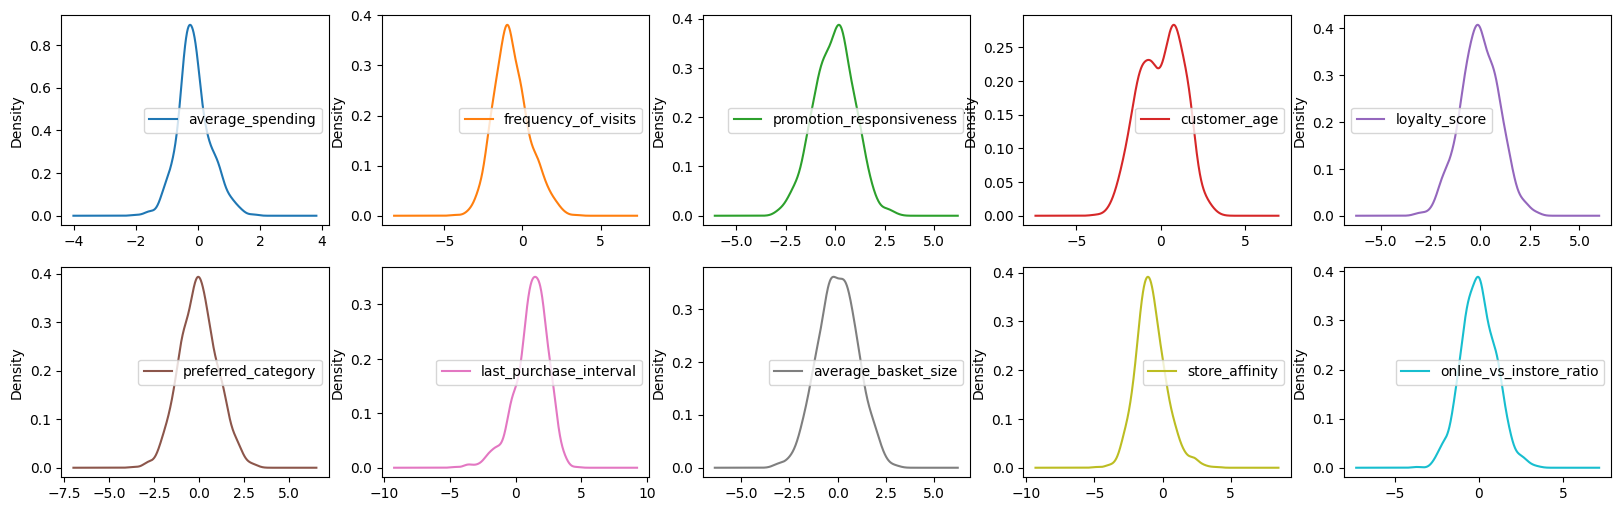

In [11]:
df.iloc[:, :-1].plot(kind='density', subplots=True, layout=(2, 5), figsize=(20, 6), sharex=False)
plt.show()

Visualize the correleation matrix of the <u>train data</u>. Hint: we have seen this in class. <br/>
Print below the determinant of the covariance matrix

What can you conclude about the data?<br/>
<font color="red">
we can see that the data sample exhibits very low multicollinearity, as indicated by its covariance matrix being close to the identity matrix. 
This suggests that the features are largely uncorrelated, supporting stable model training and straightforward interpretation.
</font>

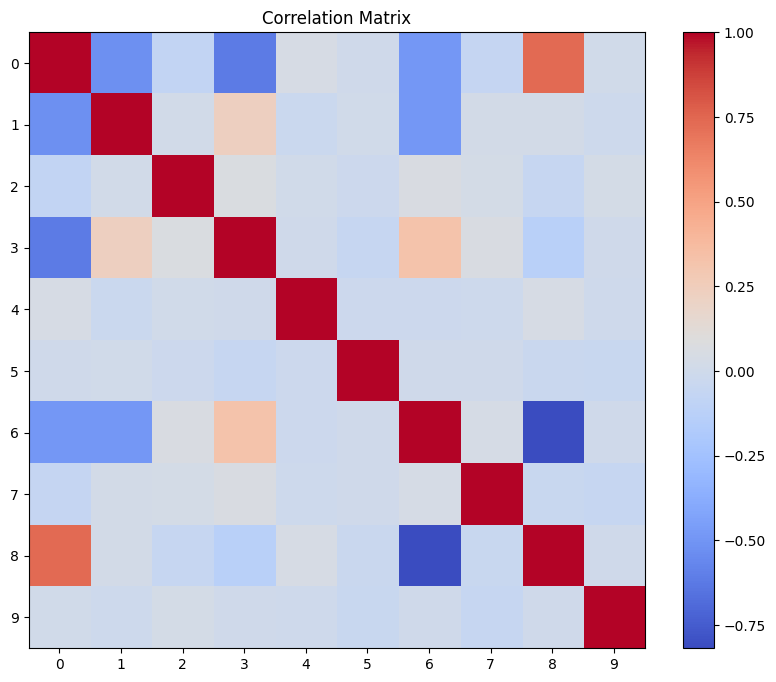

In [12]:
# Calculate correlation matrix between features
corr_matrix = np.corrcoef(x_train.T)

# Visualize 
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap= 'coolwarm')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(np.arange(x_train.shape[1]))
plt.yticks(np.arange(x_train.shape[1]))
plt.show()

In case you got a problematic feature(s) and you decide to remove them - remove at most one feature. Make sure to adjust both train and test datasets.<br/>
If not fix is required, leave the following code cell empty.

If you continue to remove features, what do you expect to happend with the train error?<br/>
<font color='red'>
if we keep removing correlated features, training error will likely go up because we are losing information. but this can help the model generalize better on test data by reducing overfitting especially for Gaussian Bayes, which can struggle with too many correlated features.
in this sample specifically the data is mostly uncorrelated which means removing feature wont affect the result as much
</font>

In [13]:
# Calculate determinant of covariance matrix
cov_matrix = np.cov(x_train, rowvar=False)
det_cov = np.linalg.det(cov_matrix)
print(f"Determinant of covariance matrix: {det_cov}")

Determinant of covariance matrix: -8.581586148469253e-32


### Implementing classification model

Implement the functions below. <br/>Both get train and test data $X\in\mathbb{R}^{n\times d}$. <br/>
Both return the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.

**Warnings:**
- Please use numpy for efficiency, as it will require only one loop. If you struggle, implement it as you know and optimize, step by step.
- No helper functions are allowed here

In [ ]:
def classify_point_gaussian_bayes(train, test):
    # Separate data by class
    classes = np.unique(y_train)
    n_classes = len(classes)
    n_features = train.shape[1]
    n_test = test.shape[0]
    
    # Initialize probabilities array
    probs = np.zeros((n_test, n_classes))
    
    # Calculate priors
    priors = np.zeros(n_classes)
    for i, c in enumerate(classes):
        priors[i] = np.mean(y_train == c)
    
    # For each class
    for i, c in enumerate(classes):
        # Get training data for this class
        x_c = train[y_train == c]
        
        # Calculate mean and covariance
        mean_c = np.mean(x_c, axis=0)
        cov_c = np.cov(x_c, rowvar=False)
        
        # Regularization
        cov_c = cov_c + np.eye(n_features) * 1e-10    # Adding small value to diagonal for numerical stability
        
        # Calculate determinant and inverse
        det = np.linalg.det(cov_c)
        
        # Handle numerical issues with determinant
        if det <= 0:
            det = 1e-10  # Based on the numerical error we picked
            
        inv_cov = np.linalg.inv(cov_c)
        
        # Calculate for each test point
        for j in range(n_test):
            # distance
            diff = test[j] - mean_c
            exponent = -0.5 * np.dot(np.dot(diff, inv_cov), diff)
            
            # Calculate log probability
            log_prob = -0.5 * n_features * np.log(2 * np.pi) - 0.5 * np.log(det) + exponent
            
            # Add log prior
            probs[j, i] = log_prob + np.log(priors[i])
    
    # Return class with highest probability (our predictions)
    return classes[np.argmax(probs, axis=1)]

def classify_point_gaussian_naive_bayes(train, test):
    # Separate data by class
    classes = np.unique(y_train)
    n_classes = len(classes)
    n_features = train.shape[1]
    n_test = test.shape[0]
    
    # Initialize probabilities array
    probs = np.zeros((n_test, n_classes))
    
    # Calculate priors
    priors = np.zeros(n_classes)
    for i, c in enumerate(classes):
        priors[i] = np.mean(y_train == c)
    
    # For each class
    for i, c in enumerate(classes):
        # Get training data for this class
        x_c = train[y_train == c]
        
        # Calculate mean and variance (not covariance)
        mean_c = np.mean(x_c, axis=0)
        var_c = np.var(x_c, axis=0)
        
        # Similarily to what we did in the gaussian bayes we add small error for numerical stability
        var_c = var_c + 1e-10
        
        # Calculate for each test point
        for j in range(n_test):
            # Calculate probability for each feature independently
            log_prob = 0
            for k in range(n_features):
                diff = test[j, k] - mean_c[k]
                log_prob += -0.5 * np.log(2 * np.pi * var_c[k]) - 0.5 * (diff**2) / var_c[k]
            
            # Add log prior (we can do multiplication if we didnt use log function)
            probs[j, i] = log_prob + np.log(priors[i])
    
    # Return class with highest probability (our predictions)
    return classes[np.argmax(probs, axis=1)]

For both GB and GNB, we will look at train vs test. Run the next cell and answer the following:
- Which model performed better? Why?
- Could the other model be sometimes <u>better</u>? How, for example?

<font color='red'>1.  The GB model achieved better learning because it takes into account the correlation between the features (in our correlation matrix some exceed over 0.4 or less than -0.5) meaning it considers the relationship between features this allows it to create more accurate model.
</font>
<br>
<font color='red'>2.  Yes, GNB can be sometimes better depending on the correlation between the features if the features are less dependent.
</font>

In [16]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(train=x_train, test=x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(train=x_train, test=x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(train=x_train, test=x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(train=x_train, test=x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

          GB      GNB
train  0.865  0.83875
test   0.840  0.82000


**Sharon, help me!** when I tried to apply the gaussian bayes I got an error saying "matrix is singular" | "invalid value encountered in log".

In theory, $\Sigma$, the covariance matrix is proved (in lectures) being PSD (in particullary - positive determinant).

However, practically, due to numerical stability it can have be small, yet negative determinant (for example, -2.383027111200437e-48). One great method for solving this issue, is instead of using $\ln\det\Sigma_c$, using $\ln(\det\Sigma_c+e^{-10})$.

From $\ln$ being increasing in $\mathbb{R^+}$, it will not effect the relative classes scores.

Now, lets visualize!

Run the boundaries plotting for train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures (do not modify it).

Answer the following:
- Briefly explain the shape of the discriminant function in this case.
- Why most of c=1 samples belong to the decision region of c=0? What scenario could lead the outcome to be more fair?

<font color='red'>
Gaussian Bayes creates curved decision boundaries (like ellipses) due to its quadratic nature. 

If most class 1 samples fall into the class 0 region, it suggests overlap - maybe because:

1. the classes are naturally similar
2. features arent discriminative enough
3. the Gaussian assumption doesnt hold.

To fix this, we can either use class weights to rebalance or Create and classify using better features
</font>

(14976, 10)


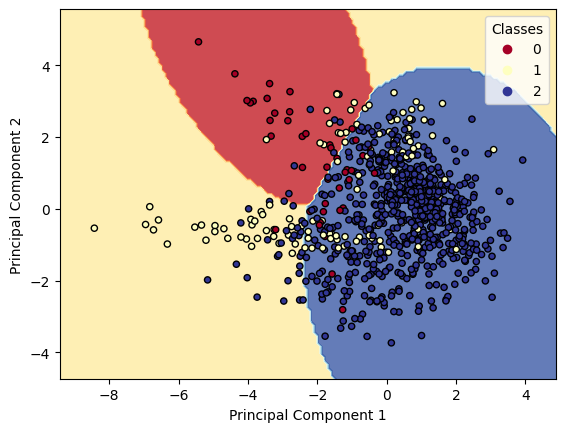

In [17]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
pca.fit_transform(x_train)
X_reduced = pca.transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(x_train, grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.show()

For curios students - Why did we plotted two features only? How does this represent the dataset?

Answer: well, you can't plot more than 3d and even there it is terrible and not possible with contour in matplotlib. But - the method for extracting those two features is called PCA, and it gurantees to get the k most represntitive features. We will talk about it later on the course.

## Question 4 - Naïve Bayes
In this problem, you'll implement a basic Naïve Bayes classifier, and use it to predict the category for article news.

You will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"tech", "business", "sport", "entertainment", "politics"}.

<b>Warning:</b> I haven't personally looked through all the data here. Even though the data is taken from a popular ML databases site, please accept my apologies if there are any offensive sentences.


Import libarires

In [2]:
import numpy as np
import pandas as pd
import math
import requests
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all articles from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to an article which is an array of words. <br/>
•	lbAll list of articles' labels.<br/>
•	voc - set of all distinct words in the entire data.<br/>
•	cat - set of article categories.


In [3]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)

  checker = 2
  texAll=[]
  lbAll=[]
  voc=[]

  wanted = requests.get(file_name)
  getLines=wanted.text.split('\n')  # here we split the file to lines and get each line.

  for line in getLines:
    part = line.split(',')    # we split each line based on the ',' and get the parts of the line.
    if len(part) < checker:       # we check if there are empty lines or not
      continue

    texAll.append(part[1].split())   # here we append the labels into texAll
    lbAll.append(part[0])
    words=part[1].split()

    for word in words:
      voc.append(word)       # here we add words to the vocabulary

  voc=set(voc)
  cat=set(lbAll)
  return texAll,lbAll,voc,cat  # returning the requested values

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

Note: this function does not need any inputs, as the train (and test) are globaly defined below.

In [4]:
def learn_NB_text():

  texAll,lbAll, voc, cat = readTrainData('https://sharon.srworkspace.com/ml/datasets/hw1/bbc_train.csv')
  P = [lbAll.count(curr_cat) for curr_cat in cat]

  j=0
  matrix = np.zeros((len(cat),len(voc)+1)) # we store in this matrix the conditional class prob.
  P = []

  for curr_cat in cat:
    counter = lbAll.count(curr_cat)
    P.append(counter)
  P = np.array(P)
  P = P / len(lbAll)         # here we finished calculating the class prior P(wi)

  for curr_cat in cat:
    List=[]
    for(i,name) in enumerate(lbAll):
      if name == curr_cat:
        sen= ' '.join(texAll[i])
        List.append(sen)     # we store the sentences in this list for the category we are currently in.

    vectorize_c = CountVectorizer(vocabulary=list(voc))
    c = vectorize_c.fit_transform(List)               # we vectorized the test data.
    count_words = c.toarray().sum(axis=0)
    sum_words = count_words.sum()

    word_p = np.array(count_words,dtype=float)
    word_p = count_words + 1           # here we finished laplace smoothing
    word_p = word_p/(sum_words+len(voc))  # here we normalize the prob.

    matrix[j]=np.append(word_p,1/(sum_words+len(voc)))
    j+=1

  Pw_column = list(voc.copy())
  Pw_column.append('UNKNOWN')
  Pw=pd.DataFrame(matrix,index=list(cat),columns=Pw_column)  # here we finished calculating Pw

  return Pw,P

Implement fhe function that classifies all articles from the test set and computes the success rate.<br/>
Iterate over all articles of test and for each article find the most probable category.


Note: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [5]:
def ClassifyNB_text(Pw, P):
	# Implement here
	texAll, lbAll, voc, cat = readTrainData('https://sharon.srworkspace.com/ml/datasets/hw1/bbc_test.csv')
	sumRight=0

	for i,sentence in enumerate(texAll):
		max_prob = -math.inf
		maxCatName = ''

		for k,cate in enumerate(cat):
			results = []
			for word in sentence:
				if word in Pw:
					x = Pw[word].get(cate,Pw['UNKNOWN'][cate])
				else:
					x = Pw['UNKNOWN'][cate]

				results.append(x)
				arr_p = np.array(results)

			curr_sum = np.log(arr_p).sum() # using the note1 given in the question[instead of multiplying we sum all of them]
			curr_prob = curr_sum + math.log(P[k]) # bayes theorem

			if curr_prob > max_prob:
				max_prob = curr_prob	# here we got the category that has the max prob.
				maxCatName = cate      # here we get the one with the max length.

		if maxCatName == lbAll[i]:
			sumRight +=1

	sumRight=sumRight/len(texAll) # here we compute the accuracy
	return sumRight		# we return the wanted accuracy

Read the files

In [6]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/bbc_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/bbc_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [7]:
Pw, P = learn_NB_text()
acc_right = ClassifyNB_text(Pw, P)
print(acc_right)

c:\Packages\Python\Lib\site-packages\sklearn\feature_extraction\text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


0.9730538922155688
